# Data Mining Assignment by Aditya Gaitonde

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy.linalg import norm 


In [243]:
df=pd.read_csv("C:/Users/Aditya Gaitonde/Downloads/magic04.data",header=None)
df.columns = ['flength','fwidth','fsize','fconc','fconc1','fasym','fm3long','fm3trans','falpha','fdist','class']

Answer a.

In [244]:
cl=df['class']

In [245]:
df=df.drop(columns=['class'])

In [246]:
df

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [247]:
df1=df.to_numpy()
sd=df1.copy()

In [248]:
std=df1.std()

In [ ]:
Z Normalisation

In [250]:
sd_z = (sd-np.mean(sd,axis = 0))/np.std(sd,axis =0)

In [251]:
sd_z

array([[-0.57722602, -0.33680419, -0.38113037, ..., -0.40584194,
         0.47681587, -1.49786555],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.49009359,
        -0.81541816,  0.15312459],
       [ 2.56827756,  6.20585836,  2.61578306, ..., -2.18302986,
         1.88922413,  0.84263513],
       ...,
       [ 0.52392318,  1.38177927,  1.31887687, ..., -0.4665087 ,
         0.10163583,  0.83900338],
       [ 1.58775746,  2.98278123,  2.47337518, ..., -3.07720555,
         2.18525981,  2.87032093],
       [ 3.16145936,  1.67999288,  0.81314905, ...,  1.49930076,
         0.96101431,  1.05044239]])

Question B.

Compute the sample covariance matrix (Σ) as sum of outer product of each
centered point

In [253]:
def outer_sum(z):
  i=0
  sum=0
  while i<=len(z)-1:
    sum=sum+np.dot(z[i].reshape(z.shape[1],1),z[i].reshape(1,z.shape[1]))
    i=i+1
  return(sum/(len(z)-1))

In [255]:
covar = oute_sum(sd_z)

In [256]:
covar

array([[ 1.00005258,  0.77055255,  0.70249069, -0.63103226, -0.59817658,
        -0.36857587, -0.11975342,  0.01338994, -0.00877795,  0.41848807],
       [ 0.77055255,  1.00005258,  0.71755458, -0.60981073, -0.58117128,
        -0.26697495, -0.17624349,  0.0397457 ,  0.06606485,  0.33683382],
       [ 0.70249069,  0.71755458,  1.00005258, -0.85089453, -0.80887754,
        -0.15987136,  0.0951622 ,  0.01545556, -0.18668498,  0.43706374],
       [-0.63103226, -0.60981073, -0.85089453,  1.00005258,  0.97646319,
         0.11227813, -0.12190575, -0.01129466,  0.23528427, -0.32834957],
       [-0.59817658, -0.58117128, -0.80887754,  0.97646319,  1.00005258,
         0.10016449, -0.11877515, -0.01096618,  0.22981062, -0.3046407 ],
       [-0.36857587, -0.26697495, -0.15987136,  0.11227813,  0.10016449,
         1.00005258,  0.27405922,  0.00255297, -0.05569155, -0.2067405 ],
       [-0.11975342, -0.17624349,  0.0951622 , -0.12190575, -0.11877515,
         0.27405922,  1.00005258, -0.0171976 

In [257]:
covmat = np.cov(sd_z,rowvar = False)

In [258]:
covmat

array([[ 1.00005258,  0.77055255,  0.70249069, -0.63103226, -0.59817658,
        -0.36857587, -0.11975342,  0.01338994, -0.00877795,  0.41848807],
       [ 0.77055255,  1.00005258,  0.71755458, -0.60981073, -0.58117128,
        -0.26697495, -0.17624349,  0.0397457 ,  0.06606485,  0.33683382],
       [ 0.70249069,  0.71755458,  1.00005258, -0.85089453, -0.80887754,
        -0.15987136,  0.0951622 ,  0.01545556, -0.18668498,  0.43706374],
       [-0.63103226, -0.60981073, -0.85089453,  1.00005258,  0.97646319,
         0.11227813, -0.12190575, -0.01129466,  0.23528427, -0.32834957],
       [-0.59817658, -0.58117128, -0.80887754,  0.97646319,  1.00005258,
         0.10016449, -0.11877515, -0.01096618,  0.22981062, -0.3046407 ],
       [-0.36857587, -0.26697495, -0.15987136,  0.11227813,  0.10016449,
         1.00005258,  0.27405922,  0.00255297, -0.05569155, -0.2067405 ],
       [-0.11975342, -0.17624349,  0.0951622 , -0.12190575, -0.11877515,
         0.27405922,  1.00005258, -0.0171976 

The calculated covariance matches the np.cov function result.

Question C.

Computing the dominant eigenvalue and eigenvector of the covariance matrix Σ
via the power-iteration method

In [259]:
def relativeError ( xnew , xold ) :
    return abs ( ( xnew - xold ) / xnew ) * 100

In [260]:
x_diff=0
result = pd.DataFrame ( columns = [ ' eigenvalue ' , ' error ' ] )
x = np.ones ( [ 10,10 ] )
max_iterations=9
oldEigenvalue = 1
for i in range ( max_iterations ) :
   x = np.dot ( covar , x )
   eigenvalue = np.linalg.norm ( x )
   error = relativeError ( eigenvalue , oldEigenvalue )
   x = x / eigenvalue
   result.loc[i]= [eigenvalue, error]
   oldEigenvalue = eigenvalue
   while np.linalg.norm(x_diff)>0.000001:
        x_diff=x[len(x)-1]-x[len(x)-2]

    
result

,eigenvalue,error
0,8.917923,88.786627
1,2.695079,230.896501
2,4.109195,34.413449
3,4.218799,2.597993
4,4.223902,0.120819
5,4.224189,0.006794
6,4.224211,0.000504
7,4.224213,0.000049
8,4.224213,0.000006


Question D

Two dominant eigenvectors of Σ using linalg.eig function

In [271]:
eigen_value,eigen_vector=np.linalg.eig(covmat)

In [278]:
eigen_vector

array([[-4.08276775e-01,  2.25698741e-01,  1.79955894e-02,
        -9.04660487e-02,  7.53225050e-01, -4.37462245e-01,
        -1.19474438e-01, -1.49895160e-02,  2.53364917e-02,
        -5.00639811e-04],
       [-3.95057049e-01,  2.45281583e-01, -1.17981303e-02,
         4.27867208e-01, -5.39478658e-01, -4.95341859e-01,
        -5.78974762e-02, -1.68904043e-01,  9.46212428e-02,
        -1.52717635e-01],
       [-4.48921929e-01, -9.33105148e-02,  1.07611883e-01,
        -8.15749467e-01, -3.21598696e-01, -1.07193101e-03,
        -1.59226791e-02, -2.76416862e-02,  5.74952569e-02,
        -7.06014805e-02],
       [ 4.41612458e-01,  1.88375795e-01,  7.48911506e-01,
        -1.48746906e-01, -7.19134376e-02, -3.30736734e-01,
        -1.80669622e-01, -1.04311902e-01, -1.08617795e-01,
         1.28919623e-01],
       [ 4.29237789e-01,  1.95951819e-01, -6.53467431e-01,
        -3.15173270e-01, -1.05167458e-01, -3.89073611e-01,
        -2.05565490e-01, -1.15773238e-01, -1.16313517e-01,
         1.

In [289]:
eigen_value

array([4.22421299, 1.57527072, 0.02024398, 0.15476152, 0.22037401,
       0.40756003, 0.74205841, 0.65012065, 0.99406496, 1.01185852])

In [290]:
ev=eigen_vector[:,0]
ev1=eigen_vector[:,1]

In [291]:
ev1

array([ 0.22569874,  0.24528158, -0.09331051,  0.1883758 ,  0.19595182,
       -0.48690288, -0.59959056,  0.03147723,  0.45670351, -0.01246824])

In [292]:
ev

array([-0.40827678, -0.39505705, -0.44892193,  0.44161246,  0.42923779,
        0.14468798, -0.00519836, -0.01235159,  0.09717497, -0.2566813 ])

In [293]:
U=np.dstack((ev,ev1)).reshape(10,2)

In [294]:
U.shape

(10, 2)

In [295]:
projected_data=np.dot(sd_z,U)

In [296]:
projected_data.var()

2.89958940053854

Question E

the eigenvectors the covariance matrix Σ
in its eigen-decomposition form (UΛUT)

In [298]:
lambdas=np.diag(eigen_value)

In [299]:
lambdas

array([[4.22421299, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.57527072, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02024398, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.15476152, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.22037401,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40756003, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.74205841, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [300]:
x=np.dot(eigen_vector,np.dot(lambdas,eigen_vector.transpose()))


In [301]:
x

array([[ 1.00005258,  0.77055255,  0.70249069, -0.63103226, -0.59817658,
        -0.36857587, -0.11975342,  0.01338994, -0.00877795,  0.41848807],
       [ 0.77055255,  1.00005258,  0.71755458, -0.60981073, -0.58117128,
        -0.26697495, -0.17624349,  0.0397457 ,  0.06606485,  0.33683382],
       [ 0.70249069,  0.71755458,  1.00005258, -0.85089453, -0.80887754,
        -0.15987136,  0.0951622 ,  0.01545556, -0.18668498,  0.43706374],
       [-0.63103226, -0.60981073, -0.85089453,  1.00005258,  0.97646319,
         0.11227813, -0.12190575, -0.01129466,  0.23528427, -0.32834957],
       [-0.59817658, -0.58117128, -0.80887754,  0.97646319,  1.00005258,
         0.10016449, -0.11877515, -0.01096618,  0.22981062, -0.3046407 ],
       [-0.36857587, -0.26697495, -0.15987136,  0.11227813,  0.10016449,
         1.00005258,  0.27405922,  0.00255297, -0.05569155, -0.2067405 ],
       [-0.11975342, -0.17624349,  0.0951622 , -0.12190575, -0.11877515,
         0.27405922,  1.00005258, -0.0171976 

Question F

In [ ]:
Mse 

In [304]:
l1=eigen_value[0]
l2=eigen_value[1]

In [305]:
mse=np.trace(covar)-l1-l2

In [306]:
mse

4.201042073900524

In [307]:
eigen_value.sum()-eigen_value[0]-eigen_value[1]

4.201042073900515

Mse of the projected space is equal to the sum of eigenvalues except the first two

Question g

 Plot the datapoints after projecting those in the first two principal components.

In [308]:
projected_1=sd_z.dot(ev)


In [309]:
projected_2=sd_z.dot(ev1)


In [310]:
res=pd.DataFrame(projected_data[:,0],columns=['PC1'])
res['PC2']=projected_data[:,1]
res['class']=cl
res.head(15)

,PC1,PC2,class
0,1.016550,-0.369256,g
1,1.679961,-0.549225,g
2,-5.966242,1.831316,g
3,2.557060,-0.031629,g
4,-1.655853,-0.552902,g
5,-0.804523,-1.575721,g
6,-0.748066,-1.194045,g
7,0.646005,-1.027600,g
8,-3.638097,-2.493231,g
9,0.565962,-1.136799,g


In [311]:
import matplotlib.pyplot as plt

In [312]:
import seaborn as sns

C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC2'>

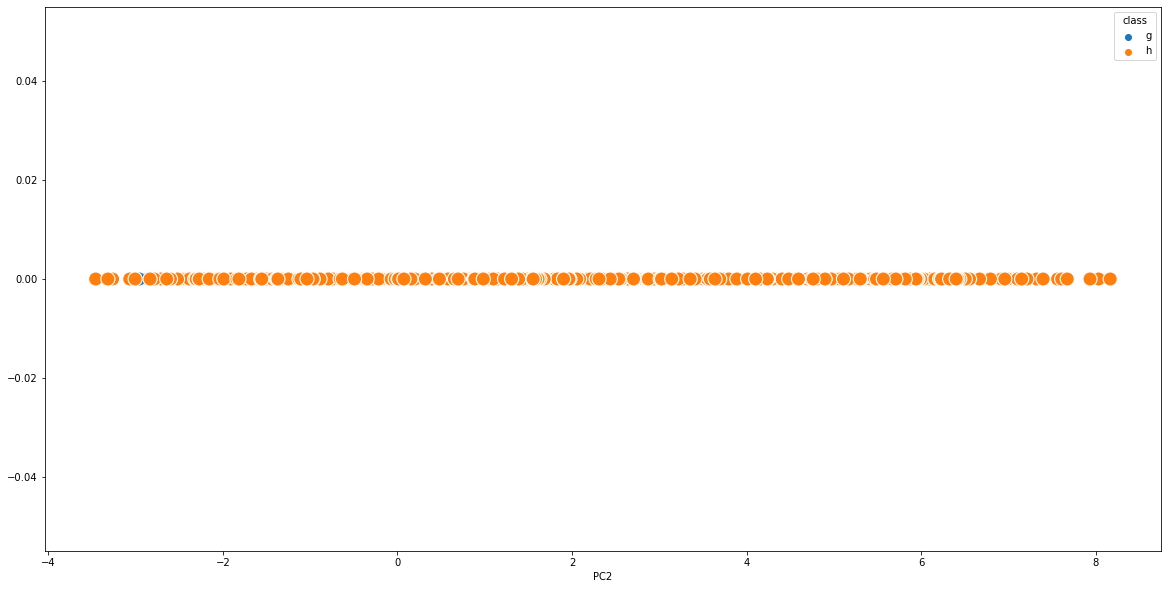

In [313]:
plt.figure(figsize=(20,10))
sns.scatterplot(res['PC2'],[0]*len(res),hue=res['class'],s=200)

Question H

PCA

In [346]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(sd_z)
reduced = pca.transform(sd_z)

In [347]:
reduced

array([[-1.01654976, -0.36925645,  0.80995074, ..., -0.52498314,
        -0.46510731, -0.03388353],
       [-1.67996111, -0.54922547, -0.98161468, ...,  0.13761196,
         0.48799867,  0.71280668],
       [ 5.96624169,  1.8313162 ,  1.49720548, ...,  0.48762911,
         3.41897421,  1.84986395],
       ...,
       [ 2.76395431, -0.49118566,  0.06280246, ...,  0.47771837,
         0.04880325, -0.24659279],
       [ 4.64718554,  2.31055878, -1.16750947, ...,  1.2418055 ,
         2.82642525, -0.9835509 ],
       [ 3.35429914,  4.76432253,  0.09326719, ..., -0.69031222,
         0.25811499, -0.00597345]])

Centered Data 

In [318]:
sd_z = (sd-np.mean(sd,axis = 0))/np.std(sd,axis =0)

Covariance Matrix

In [319]:
covar_mat = np.cov(sd_z, rowvar = False)

In [320]:
Eig_val,Eig_vec=np.linalg.eig(covar_mat)

In [321]:
Eig_val

array([4.22421299, 1.57527072, 0.02024398, 0.15476152, 0.22037401,
       0.40756003, 0.74205841, 0.65012065, 0.99406496, 1.01185852])

In [322]:
Eig_vec

array([[-4.08276775e-01,  2.25698741e-01,  1.79955894e-02,
        -9.04660487e-02,  7.53225050e-01, -4.37462245e-01,
        -1.19474438e-01, -1.49895160e-02,  2.53364917e-02,
        -5.00639811e-04],
       [-3.95057049e-01,  2.45281583e-01, -1.17981303e-02,
         4.27867208e-01, -5.39478658e-01, -4.95341859e-01,
        -5.78974762e-02, -1.68904043e-01,  9.46212428e-02,
        -1.52717635e-01],
       [-4.48921929e-01, -9.33105148e-02,  1.07611883e-01,
        -8.15749467e-01, -3.21598696e-01, -1.07193101e-03,
        -1.59226791e-02, -2.76416862e-02,  5.74952569e-02,
        -7.06014805e-02],
       [ 4.41612458e-01,  1.88375795e-01,  7.48911506e-01,
        -1.48746906e-01, -7.19134376e-02, -3.30736734e-01,
        -1.80669622e-01, -1.04311902e-01, -1.08617795e-01,
         1.28919623e-01],
       [ 4.29237789e-01,  1.95951819e-01, -6.53467431e-01,
        -3.15173270e-01, -1.05167458e-01, -3.89073611e-01,
        -2.05565490e-01, -1.15773238e-01, -1.16313517e-01,
         1.

In [323]:
s=0
for i in range (10):
    if s<df1.var():
        s=s+Eig_val[i]
    else:
        print(i)

In [324]:
Ur=Eig_vec[0:7]

In [325]:
Ur

array([[-4.08276775e-01,  2.25698741e-01,  1.79955894e-02,
        -9.04660487e-02,  7.53225050e-01, -4.37462245e-01,
        -1.19474438e-01, -1.49895160e-02,  2.53364917e-02,
        -5.00639811e-04],
       [-3.95057049e-01,  2.45281583e-01, -1.17981303e-02,
         4.27867208e-01, -5.39478658e-01, -4.95341859e-01,
        -5.78974762e-02, -1.68904043e-01,  9.46212428e-02,
        -1.52717635e-01],
       [-4.48921929e-01, -9.33105148e-02,  1.07611883e-01,
        -8.15749467e-01, -3.21598696e-01, -1.07193101e-03,
        -1.59226791e-02, -2.76416862e-02,  5.74952569e-02,
        -7.06014805e-02],
       [ 4.41612458e-01,  1.88375795e-01,  7.48911506e-01,
        -1.48746906e-01, -7.19134376e-02, -3.30736734e-01,
        -1.80669622e-01, -1.04311902e-01, -1.08617795e-01,
         1.28919623e-01],
       [ 4.29237789e-01,  1.95951819e-01, -6.53467431e-01,
        -3.15173270e-01, -1.05167458e-01, -3.89073611e-01,
        -2.05565490e-01, -1.15773238e-01, -1.16313517e-01,
         1.

In [326]:
p = Ur.transpose().dot(Ur)

In [327]:
X_bar=sd_z.dot(p)

In [344]:
reduced_data=Ur.dot(pro_data.transpose()).transpose()

In [340]:
reduced_data[10,7]

IndexError: index 7 is out of bounds for axis 1 with size 7

In [206]:
reduced

array([[-1.01654976, -0.36925645,  0.80995074, ..., -0.52498314,
        -0.46510731, -0.03388353],
       [-1.67996111, -0.54922547, -0.98161468, ...,  0.13761196,
         0.48799867,  0.71280668],
       [ 5.96624169,  1.8313162 ,  1.49720548, ...,  0.48762911,
         3.41897421,  1.84986395],
       ...,
       [ 2.76395431, -0.49118566,  0.06280246, ...,  0.47771837,
         0.04880325, -0.24659279],
       [ 4.64718554,  2.31055878, -1.16750947, ...,  1.2418055 ,
         2.82642525, -0.9835509 ],
       [ 3.35429914,  4.76432253,  0.09326719, ..., -0.69031222,
         0.25811499, -0.00597345]])

In [330]:
pro_data=sd_z.dot(Eig_vec)

In [331]:
pro_data

array([[ 1.01654976, -0.36925645,  0.10257196, ...,  0.46510731,
         1.12162721, -0.80995074],
       [ 1.67996111, -0.54922547, -0.41506035, ..., -0.48799867,
        -0.22118145,  0.98161468],
       [-5.96624169,  1.8313162 , -0.01118912, ..., -3.41897421,
         3.72895739, -1.49720548],
       ...,
       [-2.76395431, -0.49118566,  0.09879725, ..., -0.04880325,
         0.64832271, -0.06280246],
       [-4.64718554,  2.31055878, -0.07963023, ..., -2.82642525,
         2.96104592,  1.16750947],
       [-3.35429914,  4.76432253,  0.08362495, ..., -0.25811499,
        -1.57436009, -0.09326719]])

In [200]:
Ur.shape

(7, 10)

In [207]:
df

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [231]:
df

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [238]:
x_meaned=sd_z-np.mean(sd_z,axis=0)

In [239]:
x_meaned.shape

(19020, 10)

In [240]:
x_red=np.dot(Ur,x_meaned.transpose()).transpose()

In [ ]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()


In [241]:
x_red

array([[-0.2096884 ,  0.31851365,  0.38646476, ..., -0.54252077,
         0.96302844, -0.11993497],
       [ 0.83202257, -0.66216762, -0.97861673, ..., -0.40227824,
         0.47175744, -0.18988435],
       [-1.40457948,  0.12213352,  0.78080694, ...,  1.04540808,
        -1.48820668, -4.37992274],
       ...,
       [-0.87433052,  0.30545757,  1.25761427, ...,  0.26626307,
        -0.72423455, -1.49129469],
       [-0.51764343,  0.44197095,  1.01724617, ...,  1.13646796,
         0.14345173, -2.16932976],
       [ 0.35977953,  0.47718312, -0.89942646, ...,  3.02597495,
        -1.47375987,  2.37661379]])